# Polynomial regression and overfitting
> Exploring the limits of linear regression and how polynomial regression gives better results in some cases

- toc: true
- badges: true
- comments: true
- author: Gbetondji Dovonon
- categories: [notes,ammi,blog]


Linear regression can be limited if the features are not linearly related with the target. Polynomial regression can help with that. Implementing polynomial regression consists in apply an augmenting function $\Phi$ to the input features.

We could have $\Phi(\pmb x) = [x_1,x_2,...,x_d,x_1^2,x_2^2,...,x_d^2]$ \
This would square all the features and allow us to learn non linear relationships between the input features and the target.

The solution $\theta = (X^T X)^{-1} X^T Y$   becomes   $\theta = (\Phi^T \Phi)^{-1} \Phi^T Y$  where $\Phi$ is our augmented matrix

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [81]:
def mse(y_hat,y): return np.mean((y-y_hat)**2)

Elt's take the function $f(x) = 5x^2 + x$. 

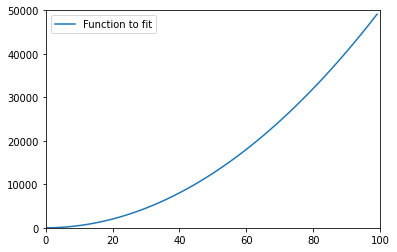

In [117]:
n_items = 100
X = np.array(list(range(n_items))).reshape(-1,1)
Y = np.array([5*x**2 + x for x,y,z in zip(Xs,Ys,Zs)]).reshape(-1,1)

sns.lineplot(x=X[:,0],y=Y[:,0],label="Function to fit")
plt.ylim((0,50000))
plt.xlim((0,100))
plt.show()

A typical linear regression model will not be able to fit the function $f$.

MSE: 30470110.138190962


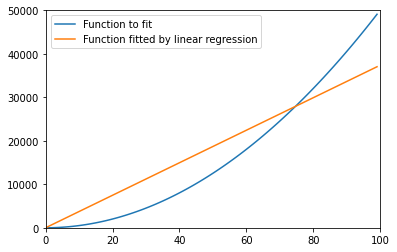

In [118]:
theta1 = np.linalg.solve(X.T @ X, X.T @ Y)
Y_hat = X @ theta1
print(f"MSE: {mse(Y_hat, Y)}")
sns.lineplot(x=X[:,0],y=Y[:,0],label="Function to fit")
sns.lineplot(x=X[:,0],y=Y_hat[:,0],label="Function fitted by linear regression")
plt.ylim((0,50000))
plt.xlim((0,100))
plt.show()

By augmenting the data we can fit the function $f$.

MSE: 1.963163934566787e-23


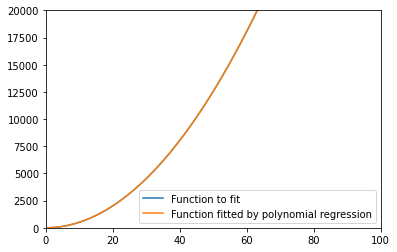

In [121]:
def augment1(X,degree=2): return np.hstack([X**k for k in range(1,degree+1)])

X2 = augment1(X)
theta = np.linalg.solve(X2.T @ X2, X2.T @ Y)
Y_hat = X2 @ theta
print(f"MSE: {mse(Y_hat, Y)}")
sns.lineplot(x=X[:,0],y=Y[:,0],label="Function to fit")
sns.lineplot(x=X[:,0],y=Y_hat[:,0],label="Function fitted by polynomial regression")
plt.ylim((0,20000))
plt.xlim((0,100))
plt.show()

It can still work with a relatively high degree for the augmentation.

MSE: 3.3419740448016697e-21


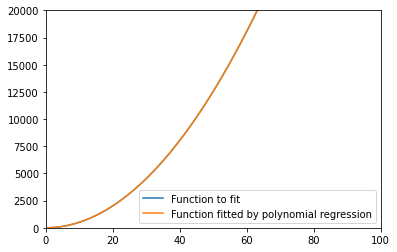

In [122]:
def augment1(X,degree=2): return np.hstack([X**k for k in range(1,degree+1)])

X2 = augment1(X,degree=5)
theta = np.linalg.solve(X2.T @ X2, X2.T @ Y)
Y_hat = X2 @ theta
print(f"MSE: {mse(Y_hat, Y)}")
sns.lineplot(x=X[:,0],y=Y[:,0],label="Function to fit")
sns.lineplot(x=X[:,0],y=Y_hat[:,0],label="Function fitted by polynomial regression")
plt.ylim((0,20000))
plt.xlim((0,100))
plt.show()

However, if the function is too complex, for instance if the degree is too high it can lead to overfitting, especially because of the noise. In this case even with perfect data, the closer the degree gets to the number of data points, the more likely we are to overfit.

MSE: 5.38062830747916e+33


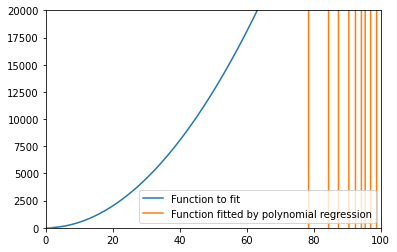

In [125]:
def augment1(X,degree=2): return np.hstack([X**k for k in range(1,degree+1)])

X2 = augment1(X,degree=10)
theta = np.linalg.solve(X2.T @ X2, X2.T @ Y)
Y_hat = X2 @ theta
print(f"MSE: {mse(Y_hat, Y)}")
sns.lineplot(x=X[:,0],y=Y[:,0],label="Function to fit")
sns.lineplot(x=X[:,0],y=Y_hat[:,0],label="Function fitted by polynomial regression")
plt.ylim((0,20000))
plt.xlim((0,100))
plt.show()

Note that we can have more complex functions like 
$$\Phi(\pmb x) = [x_1,x_2,...,x_d, x_1^2,x_1 x_2,...,x_1 x_d,...,x_d^2]$$

It can be implemeted as follow

In [ ]:
def raising(x,degree=2): 
    if degree == 2:
        return np.outer(x,x)[np.triu_indices(x.shape[0])]
    return raising(np.outer(x,x)[np.triu_indices(x.shape[0])],degree-1)

def augment(X,degree=2):
    """
    Basis function to generate new features by multiplying existing feature with each other
    """
    if degree<=1:
        return X
    n = X.shape[0]
    d = X.shape[1]
    # only values of interest are those of the upper triangular matrix formed
    # from the outer product of X^(i) by X^(i)
    tostack = []
    for i in range(n):
        tostack.append(raising(X[i])) 
        
    B = np.vstack(tostack)
        
    return B